<a href="https://colab.research.google.com/github/hagigat/NeuralNetwork/blob/master/Hopfield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IN THE NAME OF GOD


> Sajjad haghighat

> Hopfield for solve TSP problem



In [0]:
import numpy as np
from random import randint
from random import uniform
import matplotlib.pyplot as plt
import scipy.spatial.distance as sc

In [0]:
def kdelta(x, y):
      if x == y:
          return 1
      return 0

In [0]:
class Hopfield:
    def __init__(self, cities, dist):
        self.cities = cities
        self.neurons = cities**2
        self.d = dist
        self.w = np.zeros([self.neurons, self.neurons])
        self.T = self.neurons**2
        self.xti = {}
        self.itx = {}
        c = 0
        for i in range(cities):
            for j in range(cities):
                self.itx[c] = (i, j)
                self.xti[(i, j)] = c
                c += 1

    def hardlimit(self, x):
        result = (1+np.tanh(50.0*x)) / 2
        return result


    def Find_Optimal_Ans(self, A, B, C, D, iterations):
        list_E = []
        self.create_weights(A, B, C, D)
        u = np.zeros([self.neurons, 1])
        for i in range(self.cities):
          u[i][0] = uniform(0, 0.03)
        prev_E = self.Energy(u, A, B, C, D)
        repeated = 0
        max_repeat = 10
        for iteration in range(iterations):
            u = self.update(u, C)
            #u = self.SimulatedAnnealing(u, C, iteration)
            E = self.Energy(u, A, B, C, D)
            list_E = np.append(list_E, E)
            if E == prev_E:
                repeated += 1
            else:
                repeated = 0

            if repeated > max_repeat:
                break
            prev_E = E
        ret = np.zeros([self.cities, self.cities])
        for i in range(self.cities):
            for j in range(self.cities):
                ret[i][j] = u[self.xti[(i, j)]][0]

        plt.xlim(0,100)
        plt.plot([i for i in range(len(list_E))], list_E)
        plt.show()    
        return ret

    def create_weights(self, A, B, C, D):
        n = self.cities
        for i in range(n):
          for a in range(n):
            for j in range(n):
              for b in range(n):
                wc = -C
                wa = -A*(1-kdelta(a, b))*kdelta(i, j)
                wb = -B*(1-kdelta(i, j))*kdelta(a, b)
                wd = -D*self.d[i][j]*(1-kdelta(i, j))*(kdelta(a-1, b) + kdelta(a+1, b))
                self.w[self.xti[(i, a)]][self.xti[(j, b)]] = wa + wb + wc + wd

    def update(self, u, C):
        n = self.cities
        for iteration in range(5*n**2):
            i = randint(0, n-1)
            x = randint(0, n-1)
            u[self.xti[(i, x)]][0] = self.hardlimit(np.dot(u.transpose(), self.w[:, self.xti[(i, x)]]) + C*(n+1))
        return u

    def SimulatedAnnealing(self, u, C, t):
        n = self.cities
        T = self.T* (0.9)**(t)
        #print(T)
        for iteration in range(5*n**2):
            i = randint(0, n-1)
            x = randint(0, n-1)
            Net = np.dot(u.transpose(), self.w[:, self.xti[(i, x)]]) + C*(n+1)
            P1 = 1 / (1+np.exp(-Net/T))
            r = uniform(0,1)
            if r < P1 : 
              u[self.xti[(i, x)]][0] = 1
            else:
              u[self.xti[(i, x)]][0] = 0
        return u

    def Energy(self, u, A, B, C, D):
        tmpA = 0
        n = self.cities
        for i in range(n):
            for a in range(n):
                for b in range(n):
                    if a != b:
                        tmpA += u[self.xti[(i, a)]][0] * u[self.xti[(i, b)]][0]
        tmpA *= (A/2.0)

        tmpB = 0
        for i in range(n):
            for j in range(n):
                for a in range(n):
                    if i != j:
                        tmpB += u[self.xti[(i, a)]][0] * u[self.xti[(j, a)]][0]
        tmpB *= (B/2.0)

        tmpC = 0
        for i in range(n):
            for a in range(n):
                tmpC += u[self.xti[(i, a)]][0]
        tmpC = (tmpC - n)**2
        tmpC *= (C/2.0)

        tmpD = 0
        for i in range(n):
            for j in range(n):
                for a in range(n):
                    if 0 < a < n-1:
                        tmpD += self.d[i][j]*u[self.xti[(i, a)]][0]*(u[self.xti[(j, a+1)]][0] + u[self.xti[(j, a-1)]][0])
                    elif a > 0:
                        tmpD += self.d[i][j]*u[self.xti[(i, a)]][0]*(u[self.xti[(j, a-1)]][0] + u[self.xti[(j, 0)]][0])
                    elif a < n-1:
                        tmpD += self.d[i][j]*u[self.xti[(i, a)]][0]*(u[self.xti[(j, a+1)]][0] + u[self.xti[(j, n-1)]][0])
        tmpD *= (D/2.0)

        return tmpA + tmpB + tmpC + tmpD

[[5.30286844e-01 1.71196394e-01]
 [5.86282333e-01 9.32508388e-01]
 [4.05514556e-01 7.45455228e-01]
 [9.41726664e-01 6.09958420e-02]
 [2.20454641e-01 3.14563391e-01]
 [5.40181199e-01 3.31169413e-01]
 [4.94632503e-01 5.07373248e-04]
 [6.16496135e-01 5.60690673e-01]
 [6.82853958e-01 3.65888756e-01]
 [1.81524282e-01 1.95775539e-01]
 [8.45048500e-01 6.69463027e-01]
 [8.95017092e-02 9.35333941e-01]
 [9.32881484e-01 2.71843347e-01]
 [2.14653108e-01 5.28226313e-01]
 [7.58049320e-01 7.59405683e-01]
 [4.69776204e-01 7.02543019e-01]
 [6.59224413e-01 6.85869041e-01]
 [2.01987609e-01 5.04472781e-01]
 [2.70548246e-01 7.79492768e-01]
 [9.29265937e-01 5.62610480e-01]]


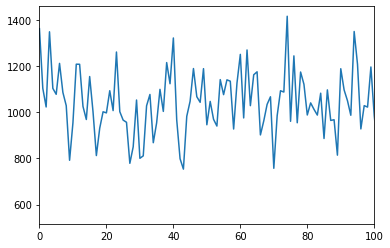

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [56]:
def distance(cities):
	n = cities.shape[0]
	d = np.zeros([n, n])
	for i in range(n):
		for j in range(n):
			d[i][j] = np.sqrt((cities[i][0]-cities[j][0])**2 + (cities[i][1]-cities[j][1])**2)
	return d

def set_cities(n):
  city = np.zeros([n, 2])
  for i in range(n):
    city[i] = np.random.random((1,2))
  print(city)  
  return city  

number_city = 20
dist = np.zeros([number_city, number_city])
city = set_cities(number_city)
dist = distance(city)
hop = Hopfield(number_city, dist)
res = hop.Find_Optimal_Ans(100.0, 100.0, 90.0, 100.0, 500)
plt.show()
print(res)
